# Explore the Radar Data!
The Radar Data has to be uncompressed before it can be explored.
This is done on a unix system via the following commands:

tar -xvf radaryyyyx.tar

gunzip radar.yyyymmdd.hh.dat.gz

Once all the data is in a nice folder in the same directory as this jupyter notebook, the fun can begin!

In [2]:
# The usual import suspects!
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from netCDF4 import Dataset
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# A useful function!
The following function was given to us by the managers of the radar data.


In [28]:
def data_read_display(filename):
    """ 
	when passed the full filename (path plus filename) of a deep learning dataset
	This function reads the binary data and rescales it
	reforms it from vector into array of the proper size
	rails the data off at suggested maximum and minimum values
	displays the data based on style, where style is cmap=style
    """
    dims = (126,201)   # rows, columns

    minmax = [0,30]	# suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    print('size of read vector',len(data))
    data = np.reshape(data,dims)

    if (np.max(data) > 0):

        # scale data to between 0 and 1 then rail off the extremes
        if (minmax[0] > 0 or minmax[1] > 0):
            data = (data - minmax[0])/(minmax[1] - minmax[0])
            data[(data < minmax[0])] = minmax[0]
            data[(data > minmax[1])] = minmax[1]
        else:
            data = (data - np.min(data))/(np.max(data) - np.min(data))

    else:
        print('empty hour!')

    # display image as grayscale
    plt.ion()  # needed if running from command line
    plt.title("2008 June 1st- 2 AM")
    plt.imshow(data, cmap="Paired", origin='lower')

size of read vector 25326


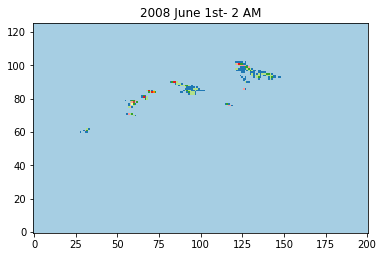

In [29]:
# let's look at our very first data file- june 1, 2008 midnight
data_read_display("radar_data/radar2008a/radar.20080601.02.dat")

In [15]:
def data_read_return(filename):
    """
    filename should be a string with the filepath to the
    .dat file to be rescaled and returned as an np array
    """
    
    dims = (126,201) # rows, columns
    minmax = [0,30] # suggested data limits for display purposes
    
    # set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
    # [0,30] mm/hr is a good range for rainfall

    data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
    # print('size of read vector',len(data))
    data = np.reshape(data,dims)
        
    return data

In [17]:
data = data_read_return("radar_data/radar2008a/radar.20080601.00.dat")
print(data)
print(np.min(data))
print(np.max(data))
print(np.mean(data))
print(np.median(data))

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
0
239
0.619205559504
0.0


In [53]:
def filepath_list(part_filepath, num_of_days):
    """
    part_filename: This string takes the initial pathing of the file up to the month, not the entire path
    num_of_days: This integer should be the number of days in the particular filepath month
    This function returns a list of file's with the appropriate endings for the radar data.
    """
    list_ = []
    s = "" # string
    for day in range(num_of_days): # 30 days in june 
        for hour in range(24): # 24 hours per day
            if (day < 10 and hour < 10):
                s = part_filepath + "0" + str(day+1) + ".0" + str(hour) + ".dat" 
            elif (day < 10 and hour >= 10):
                s = part_filepath + "0" + str(day+1) + "." + str(hour) + ".dat"
            elif (day >= 10 & hour < 10):
                s = part_filepath + str(day+1) + ".0" + str(hour) + ".dat"
            else:
                s = part_filepath + str(day+1) + "." + str(hour) + ".dat"
            list_.append(s)
    return list_

In [54]:
june_2008 = filepath_list("radar_data/radar2008a/radar.200806", 30)
print(june_2008)

['radar_data/radar2008a/radar.20080601.00.dat', 'radar_data/radar2008a/radar.20080601.01.dat', 'radar_data/radar2008a/radar.20080601.02.dat', 'radar_data/radar2008a/radar.20080601.03.dat', 'radar_data/radar2008a/radar.20080601.04.dat', 'radar_data/radar2008a/radar.20080601.05.dat', 'radar_data/radar2008a/radar.20080601.06.dat', 'radar_data/radar2008a/radar.20080601.07.dat', 'radar_data/radar2008a/radar.20080601.08.dat', 'radar_data/radar2008a/radar.20080601.09.dat', 'radar_data/radar2008a/radar.20080601.10.dat', 'radar_data/radar2008a/radar.20080601.11.dat', 'radar_data/radar2008a/radar.20080601.12.dat', 'radar_data/radar2008a/radar.20080601.13.dat', 'radar_data/radar2008a/radar.20080601.14.dat', 'radar_data/radar2008a/radar.20080601.15.dat', 'radar_data/radar2008a/radar.20080601.16.dat', 'radar_data/radar2008a/radar.20080601.17.dat', 'radar_data/radar2008a/radar.20080601.18.dat', 'radar_data/radar2008a/radar.20080601.19.dat', 'radar_data/radar2008a/radar.20080601.20.dat', 'radar_data/

In [93]:
def file_list_data(filepath_list):
    """
    filepath_list: This list of strings should contain the filepath's to the particular month of radar data
    This function returns a 3D numpy array of the data. 
    The first two dimensions contain the data on that particular hour of that particular day.
    The third dimension corresponds to which particular hour of that month to view
    """ 

In [138]:
datas = [] # empty list
for path in paths: # go through the list of filepaths
    datas.append(data_read_return(path))

size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326
size of read vector 25326


In [130]:
datas

[array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       

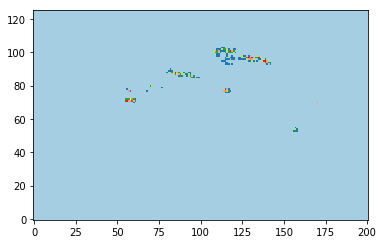

In [131]:
plt.imshow(datas[0], cmap="Paired", origin='lower')

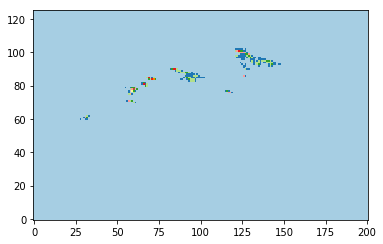

In [58]:
plt.imshow(datas[1], cmap="Paired", origin='lower')

In [59]:
np.min(datas[0])

0.0

In [139]:
np.max(datas[0])

9.7333333333333325

In [61]:
np.mean(datas[0])

0.022006370265076736

In [65]:
np.shape(datas[0])

(126, 201)

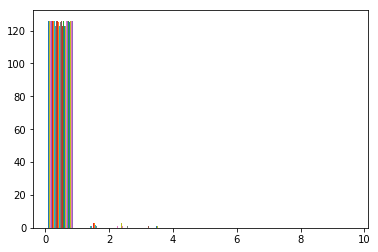

In [72]:
plt.hist(datas[0])
plt.show()

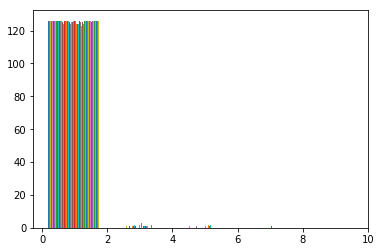

In [73]:
plt.hist(datas[0], bins=5)
plt.show()

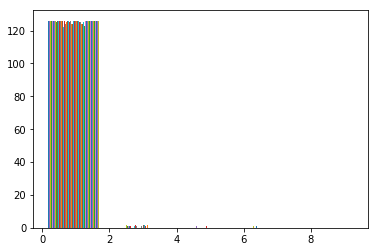

In [75]:
plt.hist(datas[1], bins=5)
plt.show()

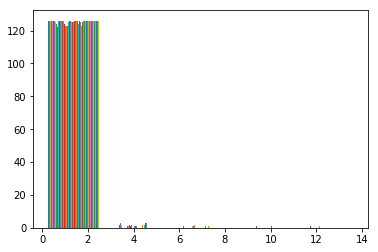

In [76]:
plt.hist(datas[2], bins=5)
plt.show()

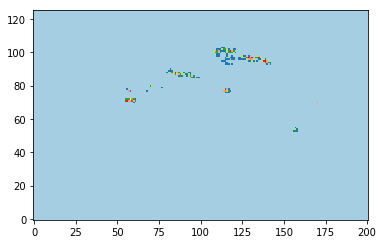

In [77]:
plt.imshow(datas[0], cmap="Paired", origin='lower')

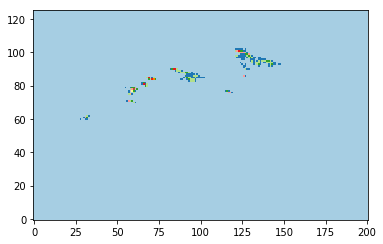

In [78]:
plt.imshow(datas[1], cmap="Paired", origin='lower')

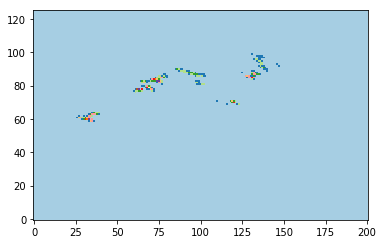

In [79]:
plt.imshow(datas[2], cmap="Paired", origin='lower')

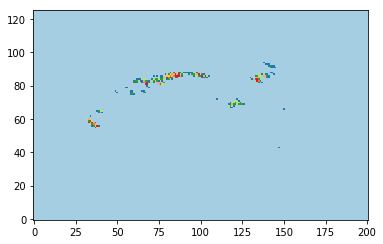

In [80]:
plt.imshow(datas[3], cmap="Paired", origin='lower')

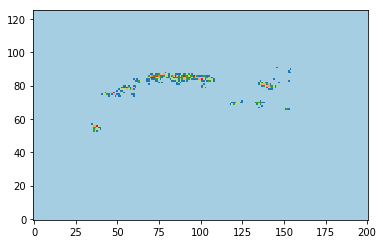

In [81]:
plt.imshow(datas[4], cmap="Paired", origin='lower')

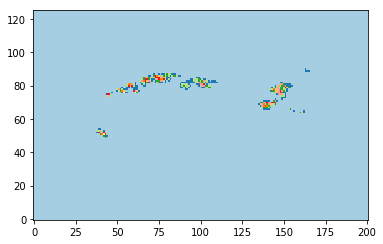

In [82]:
plt.imshow(datas[5], cmap="Paired", origin='lower')

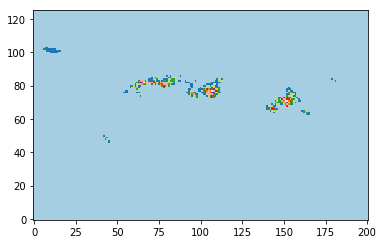

In [83]:
plt.imshow(datas[6], cmap="Paired", origin='lower')

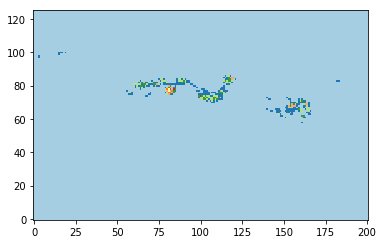

In [84]:
plt.imshow(datas[7], cmap="Paired", origin='lower')

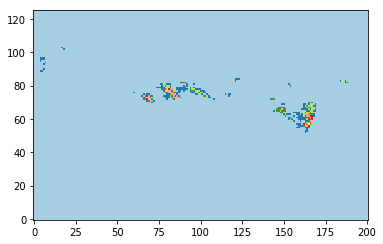

In [85]:
plt.imshow(datas[8], cmap="Paired", origin='lower')

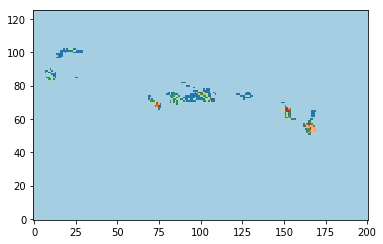

In [95]:
plt.imshow(datas[9], cmap="Paired", origin='lower')

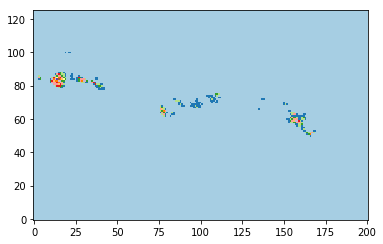

In [96]:
plt.imshow(datas[10], cmap="Paired", origin='lower')

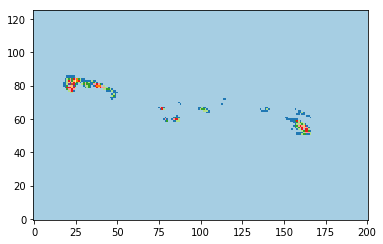

In [97]:
plt.imshow(datas[11], cmap="Paired", origin='lower')

Traceback (most recent call last):
  File "C:\Users\cruza\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 389, in process
    proxy(*args, **kwargs)
  File "C:\Users\cruza\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 227, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\cruza\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1081, in _start
    self._init_draw()
  File "C:\Users\cruza\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1617, in _init_draw
    for artist in f:
TypeError: 'AxesImage' object is not iterable


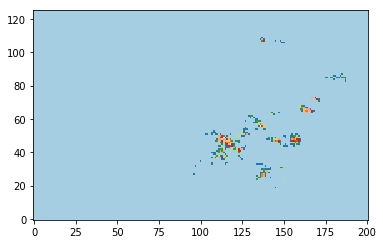

In [104]:
ims = []
for i in range(len(datas)):
    ims.append(plt.imshow(datas[i], cmap="Paired", origin='lower', animated=True))

fig = plt.figure(figsize=(126,201))
ami = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

In [140]:
datas[0]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [141]:
print(type(datas[0]))

<class 'numpy.ndarray'>


In [76]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_01.nc'  # Your filename
nc_fid = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
print(nc_fid)

data = nc_fid.variables
nc_fid.close()

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    Source: McIDAS Area File
    Satellite Sensor: G-13 IMG    
    dimensions(sizes): xc(3168), yc(840), time(1), auditCount(2), auditSize(80)
    variables(dimensions): int32 version(), int32 sensorID(), int32 imageDate(), int32 imageTime(), int32 startLine(), int32 startElem(), int32 time(time), int32 dataWidth(), int32 lineRes(), int32 elemRes(), int32 prefixSize(), int32 crDate(), int32 crTime(), int32 bands(), |S1 auditTrail(auditCount,auditSize), float32 data(time,yc,xc), float32 lat(yc,xc), float32 lon(yc,xc)
    groups: 



size of read vector 25326
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


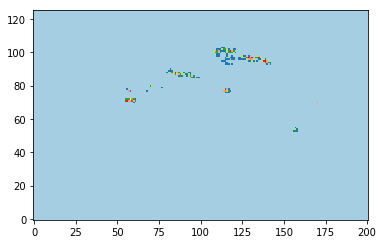

In [22]:
filename = "radar_data/radar2008a/radar.20080601.01.dat"

dims = (126,201)   # rows, columns
minmax = [0,30]	# suggested data limits for display purposes

# set minmax = [0,0] to use minimum and maximum of each file (excluding missing data)
# [0,30] mm/hr is a good range for rainfall

data = np.fromfile(filename,dtype='int16',count=-1,sep='') # 2 byte integers
print('size of read vector',len(data))
data = np.reshape(data,dims)

if (np.max(data) > 0):

    # scale data to between 0 and 1 then rail off the extremes
    if (minmax[0] > 0 or minmax[1] > 0):
        data = (data - minmax[0])/(minmax[1] - minmax[0])
        data[(data < minmax[0])] = minmax[0]
        data[(data > minmax[1])] = minmax[1]
    else:
        data = (data - np.min(data))/(np.max(data) - np.min(data))

else:
    print('empty hour!')

# display image as grayscale
plt.ion()  # needed if running from command line
plt.imshow(data, cmap="Paired", origin='lower')

print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.4
    Source: McIDAS Area File
    Satellite Sensor: G-13 IMG    
    dimensions(sizes): xc(3168), yc(840), time(1), auditCount(2), auditSize(80)
    variables(dimensions): int32 version(), int32 sensorID(), int32 imageDate(), int32 imageTime(), int32 startLine(), int32 startElem(), int32 time(time), int32 dataWidth(), int32 lineRes(), int32 elemRes(), int32 prefixSize(), int32 crDate(), int32 crTime(), int32 bands(), |S1 auditTrail(auditCount,auditSize), float32 data(time,yc,xc), float32 lat(yc,xc), float32 lon(yc,xc)
    groups: 

[[ 2368.  2336.  2368. ...,  1952.  1760.  1920.]
 [ 2432.  2464.  2432. ...,  2080.  2016.  2048.]
 [ 2464.  2496.  2464. ...,  1760.  1760.  1920.]
 ..., 
 [ 2784.  2816.  2944. ...,  1024.  1024.  1056.]
 [ 2784.  2752.  2720. ...,  1024.   928.   992.]
 [ 2560.  2560.  2688. ...,  1152.  1056.  1024.]]
896.0
12160.0
2296.84
1888.0


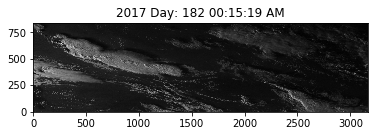

In [5]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_01.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
print(band_01)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
print(np.min(data[0]))
print(np.max(data[0]))
print(np.mean(data[0]))
print(np.median(data[0]))
plt.title("2017 Day: 182 00:15:19 AM")
plt.imshow(data[0], cmap="gray", origin="lower")
band_01.close()

[[ 8928.  8928.  8096. ...,  2688.  2656.  2720.]
 [ 8512.  8864.  8736. ...,  2880.  3040.  3616.]
 [ 8704.  8768.  8512. ...,  3328.  2912.  2912.]
 ..., 
 [ 9408.  7680.  4064. ...,  2400.  2688.  2880.]
 [ 8672.  4320.  3840. ...,  2368.  2432.  2784.]
 [ 5504.  4192.  3808. ...,  2496.  2752.  3328.]]


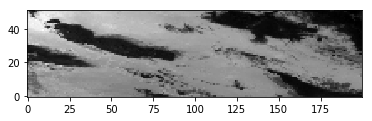

In [132]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_02.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
nc_fid.close()

[[  6912.   6912.   6976. ...,   4416.   4544.   4096.]
 [  6976.   6976.   6976. ...,   5504.   5376.   5760.]
 [  7104.   7104.   7168. ...,   5504.   5056.   4864.]
 ..., 
 [ 10016.   6656.   4160. ...,   4480.   5184.   6144.]
 [  7680.   4416.   3904. ...,   3904.   4416.   4800.]
 [  4992.   4800.   5504. ...,   4544.   4992.   6016.]]


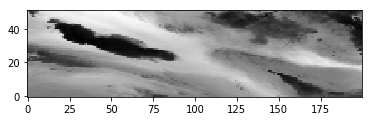

In [133]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_03.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
nc_fid.close()

[[ 16832.  16832.  16704. ...,   8864.   9056.   8960.]
 [ 16800.  16928.  17024. ...,  10560.   9824.  10336.]
 [ 16832.  16800.  16704. ...,  11072.  10112.   9152.]
 ..., 
 [ 17216.  11616.   8288. ...,   7872.   8672.   9760.]
 [ 13792.   8896.   8224. ...,   7680.   8320.   8864.]
 [  9760.   9760.  10176. ...,   8448.   9344.  11424.]]


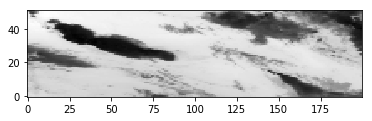

In [32]:
nc_f = 'satellite_data/goes13.2017.182.001519.BAND_06.nc'  # Your filename
band_01 = Dataset(nc_f, 'r')  # Dataset is the class behavior to open the file
                             # and create an instance of the ncCDF4 class
#print(nc_fid.file_format)
#print(nc_fid)
data = band_01.variables['data'][:]
print(data[0])
plt.imshow(data[0], cmap="gray", origin="lower")
band_01.close()

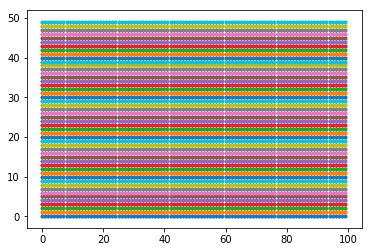

In [122]:
for row in range(100):
    for col in range(50):
        plt.scatter(row, col, s=data)
plt.show()